---
layout: page
title: S&P500 and Tesla
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
start_date = pd.to_datetime('2011-01-01')
end_date = pd.to_datetime('2025-01-01')

## SPX 500

This notebook imports SPX historical data from csv - rather than magic importing the dataframe from memory.

In [2]:
# S&P 500 SPX monthly index from 1959
#csv_file = 'https://finance.yahoo.com/quote/%5EGSPC/history?period1=1262304000&period2=1702771200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'
# extracted table to html file
html_file = '../data/temp.html'
local_file = '../data/spx_HistoricalData2010.csv'
#max_age = datetime.timedelta(days=7)
#if not os.path.exists(local_file) or datetime.datetime.now() - datetime.datetime.fromtimestamp(os.path.getmtime(local_file)) > max_age:
#    import urllib.request
#    urllib.request.urlretrieve(csv_file, local_file)
#dfSpx = pd.read_csv(local_file, encoding='cp1252')    
dfSpx = pd.read_html(html_file, encoding='cp1252')[0] 
dfSpx.to_csv(local_file, index=False)
dfSpx = dfSpx.drop(dfSpx.index[-1]) # drop the last row of disclaimers

/tmp/ipykernel_2698/2741638322.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfSpx = pd.read_html(html_file, encoding='cp1252')[0]


ImportError: Missing optional dependency 'html5lib'.  Use pip or conda to install html5lib.

In [ ]:
dfSpx.rename(columns={'Adj Close**': 'Price'}, inplace=True)
dfSpx['Price'] = pd.to_numeric(dfSpx['Price'], errors='coerce')
dfSpx['Date'] = pd.to_datetime(dfSpx['Date'], format='%b %d, %Y')
dfSpx.set_index('Date', inplace=True)
dfSpx.sort_values(by='Date', ascending=True, inplace=True)
dfSpx.head()

,Open,High,Low,Close*,Price,Volume
Date,,,,,,
2010-01-04,1116.56,1133.87,1116.56,1132.99,1132.99,3991400000
2010-01-05,1132.66,1136.63,1129.66,1136.52,1136.52,2491020000
2010-01-06,1135.71,1139.19,1133.95,1137.14,1137.14,4972660000
2010-01-07,1136.27,1142.46,1131.32,1141.69,1141.69,5270680000
2010-01-08,1140.52,1145.39,1136.22,1144.98,1144.98,4389590000


In [ ]:
dfSpx['YoY Change'] = dfSpx['Price'].pct_change(periods=252) *100
dfSpx['3 Yr Rolling Avg'] = dfSpx['YoY Change'].rolling(window=(252*3), min_periods=1).mean()
dfSpx = dfSpx.loc[dfSpx.index >= start_date]
dfSpx.tail()

,Open,High,Low,Close*,Price,Volume,YoY Change,3 Yr Rolling Avg
Date,,,,,,,,
2023-12-11,4593.39,4623.71,4593.39,4622.44,4622.44,3823210000,16.624911,11.804009
2023-12-12,4618.30,4643.93,4608.09,4643.70,4643.70,3808380000,18.028762,11.805042
2023-12-13,4646.20,4709.69,4643.23,4707.09,4707.09,5063650000,17.955625,11.806626
2023-12-14,4721.04,4738.57,4694.34,4719.55,4719.55,6314040000,17.411964,11.808998
2023-12-15,4714.23,4725.53,4704.69,4719.19,4719.19,8218980000,18.117948,11.812982


# TSLA

In [ ]:
# Daily TSLA index for 10 years from 2013
# https://www.nasdaq.com/market-activity/index/tsla/historical  < NO! DOES NOT INC SPLIT ADJUSTED CLOSE! USE YAHOO!
# https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1701907200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
# Select max date range and download csv file
csv_file = '../data/tsla_HistoricalData.csv'
dfTsla = pd.read_csv(csv_file, encoding='cp1252', usecols=['Date', 'Adj Close'])


In [ ]:
#dfTsla.rename(columns={'Price': 'Pre-split Price'}, inplace=True)
dfTsla.rename(columns={'Adj Close': 'Price'}, inplace=True)
dfTsla['Date'] = pd.to_datetime(dfTsla['Date'])
dfTsla.set_index('Date', inplace=True)
dfTsla.sort_values(by='Date', ascending=True, inplace=True)
dfTsla.head()

,Price
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [ ]:
# weekly change Year over Year
dfTsla['YoY Change'] = dfTsla['Price'].pct_change(periods=252) * 100
dfTsla['3 Yr Rolling Avg'] = dfTsla['YoY Change'].rolling(window=(252*3)).mean()
dfTsla = dfTsla.loc[dfTsla.index >= start_date]
dfTsla.head()

,Price,YoY Change,3 Yr Rolling Avg
Date,,,
2011-01-03,1.774667,NaN,NaN
2011-01-04,1.778000,NaN,NaN
2011-01-05,1.788667,NaN,NaN
2011-01-06,1.858667,NaN,NaN
2011-01-07,1.882667,NaN,NaN


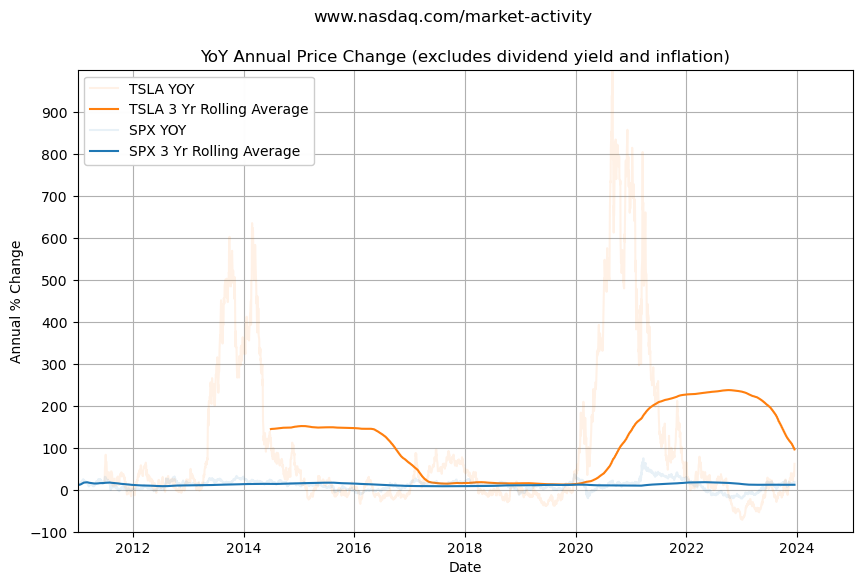

In [ ]:
plt.figure(figsize=(10, 6))
colors = list(plt.rcParams['axes.prop_cycle'])
plt.plot(dfTsla.index, dfTsla['YoY Change'], label='TSLA YOY', color=colors[1]['color'], alpha=0.1)
plt.plot(dfTsla.index, dfTsla['3 Yr Rolling Avg'], label='TSLA 3 Yr Rolling Average', color=colors[1]['color'])
plt.plot(dfSpx.index, dfSpx['YoY Change'], label='SPX YOY', color=colors[0]['color'], alpha=0.1)
plt.plot(dfSpx.index, dfSpx['3 Yr Rolling Avg'], label='SPX 3 Yr Rolling Average', color=colors[0]['color'])
plt.xlabel('Date')
plt.ylabel('Annual % Change')
plt.suptitle('www.nasdaq.com/market-activity')
plt.title('YoY Annual Price Change (excludes dividend yield and inflation)')
plt.grid(True)
plt.yticks(range(-100, 1000, 100))
plt.ylim(bottom=-100, top=1000)
plt.xlim(left=start_date, right=end_date)
#plt.axhline(y=0, color='darkred')  # Add horizontal line at y=0
legend = plt.legend(loc='best')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
plt.show()